# Gaussian Blur
Blurring an image can be done by reducing the level of noise in the image by applying a filter to an image. Image blurring is one of the important aspects of image processing.

The ImageFilter class in the Pillow library provides several standard image filters. Image filters can be applied to an image by calling the filter() method of Image object with required filter type as defined in the ImageFilter class.

This filter also uses parameter radius and does the same work as box blur with some algorithmic changes. In short, changing the radius value, will generate different intensity of ‘Gaussianblur’ images.

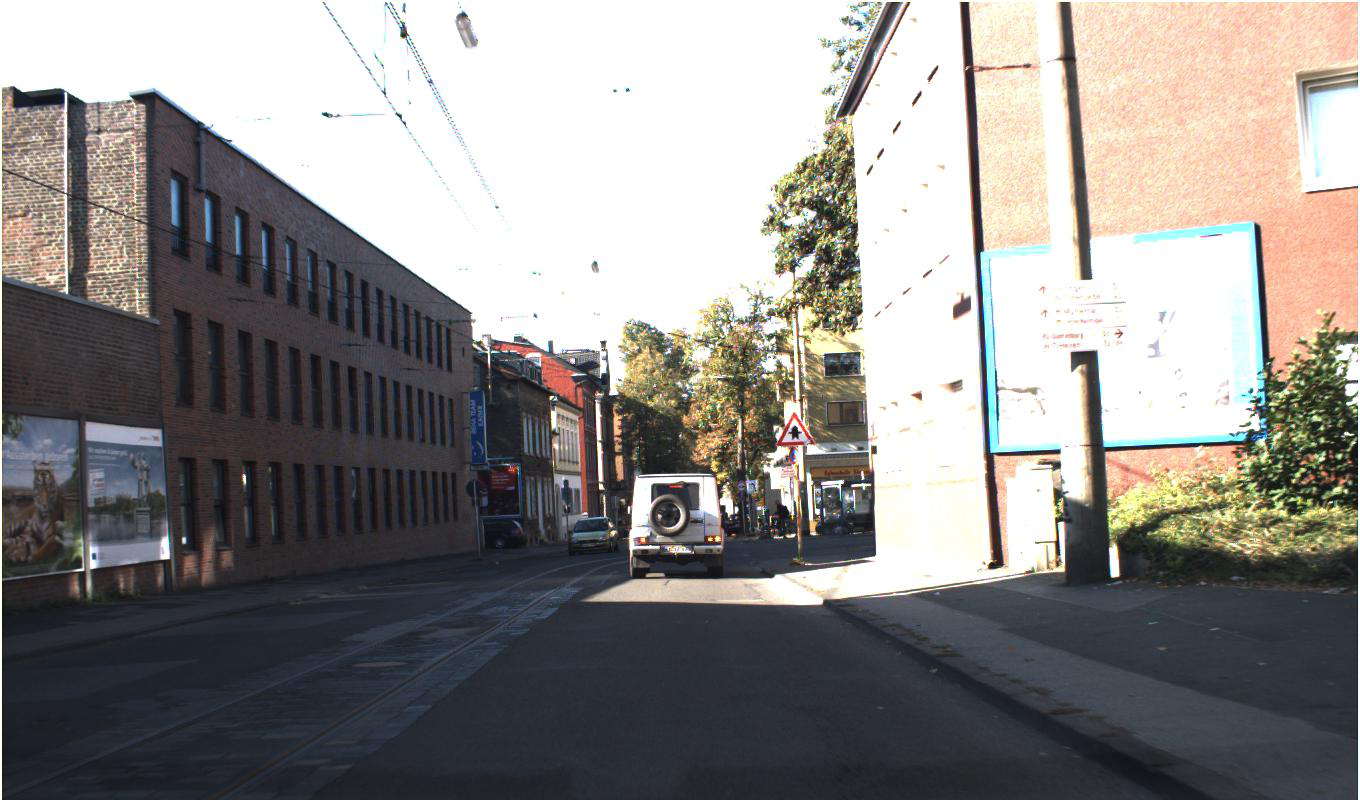

In [1]:
from PIL import Image, ImageFilter

origImage = Image.open("../data/datasets/gtsdb/train/images/00000.jpg")
display(origImage)

Blurring the image, radius is proportional to the intensity of the blur that is applied.

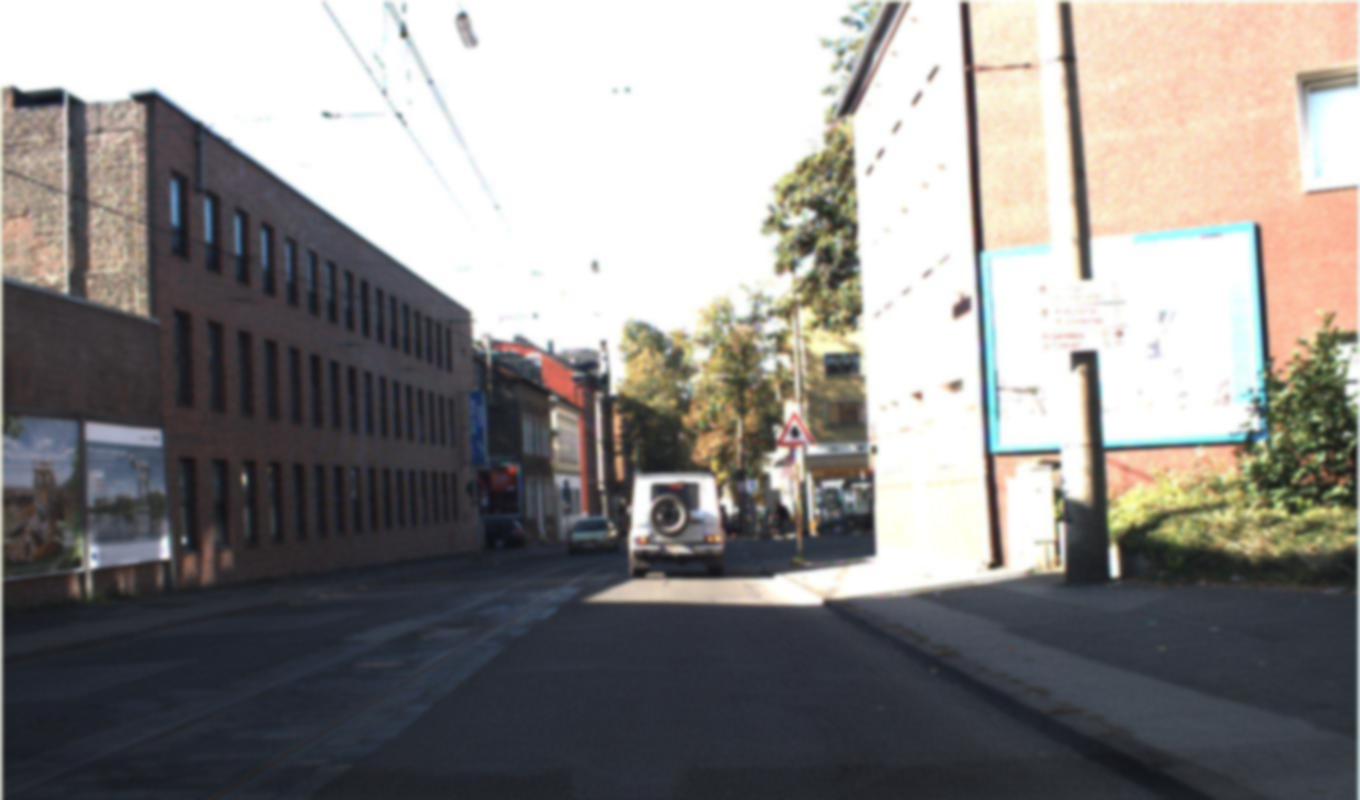

In [2]:
gauss_Image = origImage.filter(ImageFilter.GaussianBlur(radius=2))
display(gauss_Image)

# Noise
## Gaussian noise
Image noise is a random variation in the intensity values. Thus, by randomly inserting some values in an image, we can reproduce any noise pattern.

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mimage
import cv2

Try loading an image with different APIs, as I experienced Problems with displaying images in Pycharm. In VS Code, as shown below, it works as expected.

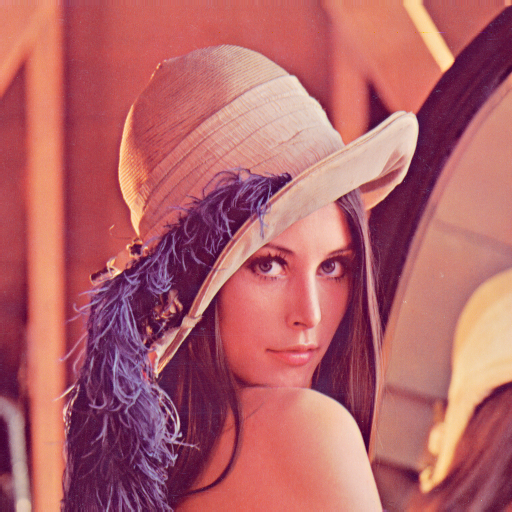

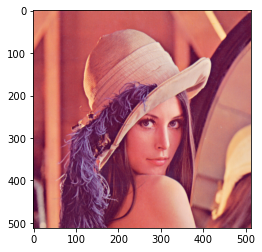

In [4]:
lenna = Image.open("../Lenna_(test_image).png")
display(lenna)
im_array = np.array(lenna)
plt.imshow(lenna)

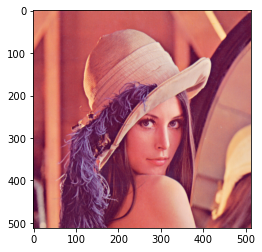

In [5]:
lenna_mimage = mimage.imread("../Lenna_(test_image).png")
plt.imshow(lenna_mimage)

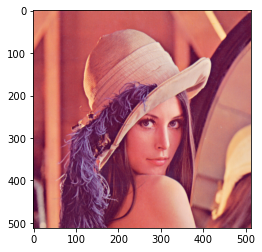

In [6]:
cv_image = cv2.imread("../Lenna_(test_image).png")
RGB_im = cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_im)

In [7]:
print(im_array.shape)
print(im_array)

(512, 512, 3)
[[[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 [[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 [[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 ...

 [[ 84  18  60]
  [ 84  18  60]
  [ 92  27  58]
  ...
  [173  73  84]
  [172  68  76]
  [177  62  79]]

 [[ 82  22  57]
  [ 82  22  57]
  [ 96  32  62]
  ...
  [179  70  79]
  [181  71  81]
  [185  74  81]]

 [[ 82  22  57]
  [ 82  22  57]
  [ 96  32  62]
  ...
  [179  70  79]
  [181  71  81]
  [185  74  81]]]


In [8]:
gauss = np.random.normal(0,1,cv_image.size)
gauss = gauss.reshape(cv_image.shape[0],cv_image.shape[1],cv_image.shape[2]).astype('uint8')
# Add the Gaussian noise to the image
img_gauss = cv2.add(cv_image,gauss)

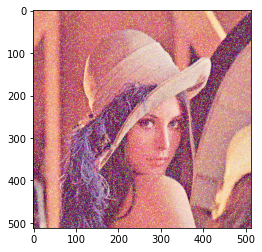

In [9]:
RGB_gaussian_noise_im = cv2.cvtColor(img_gauss, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_gaussian_noise_im)

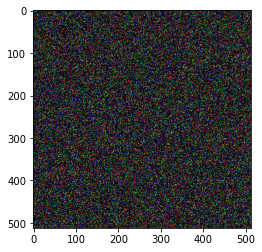

In [10]:
plt.imshow(gauss)

## Salt and Pepper Noise
Salt-and-pepper noise is  a sparsely occurring  white and  black pixels sometimes  seen on images. The Salt & Pepper  noise is generally  caused by  defect of  camera sensor,  software failure,  or hardware failure  in  image  capturing  or  transmission. Due  to  this  situation,  Salt  & Pepper  noise  model,  only  a 
proportion of all the image pixels are corrupted whereas other pixels are non-noisy [12]. A standard Salt & 
Pepper noise value may be either minimum (0) or maximum (255). The typical intensity value for pepper 
noise is close to 0 and for salt noise is close to 255. Furthermore, the unaffected pixels remain unchanged. 

\begin{equation}
    \eta(x,y) = 
    \begin{cases}
        0, \text{Pepper noise} \\
        255, \text{Salt noise}
    \end{cases}
\end{equation}
Source: [researchgate - Salt and Pepper Noise Effects and Removal](https://www.researchgate.net/publication/326408527_Salt_and_Pepper_Noise_Effects_and_Removal)

In [11]:
pixel = (
    np.random.randint(0, 10),
    np.random.randint(0, 10)
    )
pixel

(9, 0)

In [12]:
def draw_pixel(already_perturbed_pixels, rows, cols):
    new_Pixel = False
    while(not new_Pixel):
        pixel = (
            np.random.randint(0, rows),
            np.random.randint(0, cols)
            )
        if pixel not in already_perturbed_pixels: new_Pixel = True
    return pixel

# frac: Der Anteil der Pixel der gestört werden soll; image: Numpy Array of shape (row, col, 3)
def add_salt_and_pepper(frac, image):
    row, col, _ = image.shape
    perturbed_image = image.copy()
    already_perturbed_pixels = set()
    for i in range(int(row * col * frac)):
        pixel = draw_pixel(already_perturbed_pixels=already_perturbed_pixels, rows=row, cols=col)
        already_perturbed_pixels.add(pixel)
        perturbed_image[pixel[0], pixel[1]] = [255,255,255] if(np.random.randint(0,2)) else [0,0,0]
    return perturbed_image

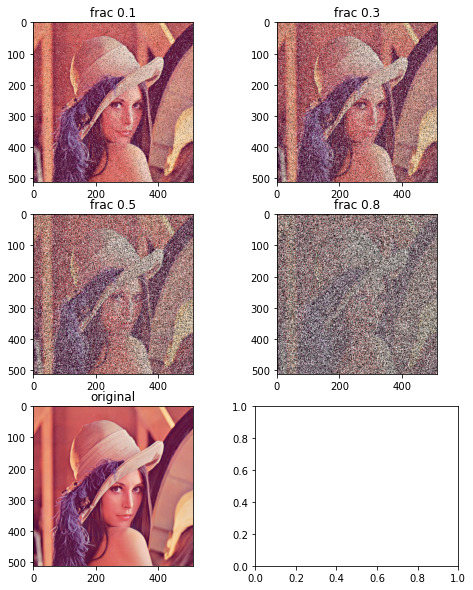

In [13]:
image_bgr = cv2.imread("../Lenna_(test_image).png")
image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(3,2, figsize=(8, 10))
axs[0,0].imshow(add_salt_and_pepper(frac=0.1, image=image))
axs[0,0].set_title("frac 0.1")
axs[0,1].imshow(add_salt_and_pepper(frac=0.3, image=image))
axs[0,1].set_title("frac 0.3")
axs[1,0].imshow(add_salt_and_pepper(frac=0.5, image=image))
axs[1,0].set_title("frac 0.5")
axs[1,1].imshow(add_salt_and_pepper(frac=0.8, image=image))
axs[1,1].set_title("frac 0.8")
axs[2,0].imshow(image)
axs[2,0].set_title("original")
plt.show()

# Aufhellen & Abdunkeln
Die Bild Helligkeit und der Bildkontrast werden durch Homogene Punktoperationen manipuliert. Das bedeutet das sie durch eine Funktion $f: D \rightarrow D'$ definiert wird, die jedem Pixel Wert $q \in D$ einen neuen Pixelwert $q' \in D'$ zuordnet: $I' = f(I)$

Für die Aufhellung und Kontrasterhöhung wird eine multiplikation und eine addition mit konstanten verwendet:
\begin{equation}
g(x) = \alpha f(x) + \beta
\end{equation}
Die parameter $\alpha > 0$ und $\beta$ werden oft auch als *gain* und *bias* bezeichnet. In der obigen Formel steht $x$ für das Bild, für einen einzigen Pixel, kann die obige Formel wie folgt geschrieben werden:
\begin{equation}
g(i,j) = \alpha * f(i,j) + \beta
\end{equation}
Wobei i und j die indexe des jeweiligen Pixel sind.

In [14]:
# brightness range [0-255]
def change_image_brightness(brightness, image):
    perturbed_image = cv2.convertScaleAbs(image, alpha=1, beta=brightness)
    perturbed_image = cv2.cvtColor(perturbed_image, cv2.COLOR_BGR2RGB)
    return perturbed_image


Text(0.5, 1.0, 'brigthness -60')

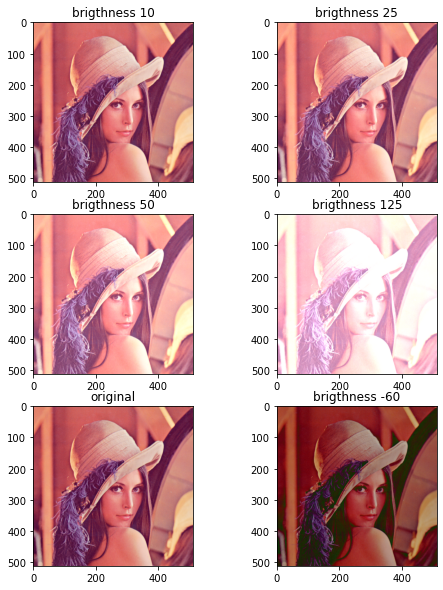

In [15]:
fig, axs = plt.subplots(3,2, figsize=(8, 10))
axs[0,0].imshow(change_image_brightness(brightness=10, image=image_bgr))
axs[0,0].set_title("brigthness 10")
axs[0,1].imshow(change_image_brightness(brightness=25, image=image_bgr))
axs[0,1].set_title("brigthness 25")
axs[1,0].imshow(change_image_brightness(brightness=50, image=image_bgr))
axs[1,0].set_title("brigthness 50")
axs[1,1].imshow(change_image_brightness(brightness=125, image=image_bgr))
axs[1,1].set_title("brigthness 125")
axs[2,0].imshow(image)
axs[2,0].set_title("original")
axs[2,1].imshow(change_image_brightness(brightness=-60, image=image_bgr))
axs[2,1].set_title("brigthness -60")

# Abdecken von Teilen des Bildes
## Blocken von Teilen des Bildes
Hierbei muss darauf geachtet werden, das die ROI des Schildes nicht vollständig geblockt wird

startpoint = (x1, y1) <br>
endpoint = (x2,y2) <br>
x1,y1 ------ <br>
|          | <br>
|          | <br>
|          | <br>
--------x2,y2 <br>
thickness beschreibt die Breite der Linie des Rechtecks, bei -1 wird das gesamte rechteck farblich gefüllt <br>
color = (BGR)

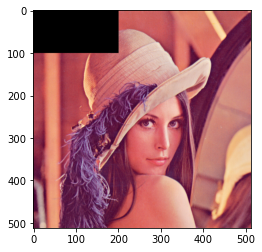

In [16]:
startpoint = (0,0)
endpoint = (200, 100)
color = (0,0,0)
thickness = -1
blocked_edge = cv2.rectangle(image, startpoint, endpoint, color=color, thickness=thickness)
plt.imshow(blocked_edge)

## Overlay stickers
available stickers for overlay are found in *../data/stickers/*. Some stickers have an alpha channel to include a transparent background, this is needed for non rectangular images. All images were cropped and edited in GIMP. Stickers were downloaded from google pictures.

In [17]:
sticker_folder_path = "../data/stickers/"
stickers = os.listdir(sticker_folder_path)
print(stickers)

['trasher-white.png', 'fod.png', 'new-horizon.png', 'iraqistan.png', 'trasher-black.png', 'Hamburg.png', 'british-flag.png', 'multi-stickers.png', 'caution.png']


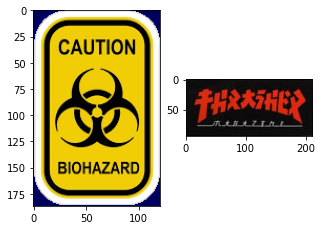

In [18]:
sticker_caution = cv2.imread(f"{sticker_folder_path}{stickers[8]}", -1)
sticker_trasher_black = cv2.imread(f"{sticker_folder_path}{stickers[4]}", -1)

sticker_caution_rgb = cv2.cvtColor(sticker_caution, cv2.COLOR_BGR2RGB)
sticker_trasher_black_RGB = cv2.cvtColor(sticker_trasher_black, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1,2, figsize=(5,5))
axs[0].imshow(sticker_caution_rgb)
axs[1].imshow(sticker_trasher_black_RGB)

In [19]:
def overlay_sticker_with_alpha_channel(image, sticker):
    x_offset=y_offset=50

    image_with_overlay = image.copy()

    #calculate x and y coordinates to draw sticker
    y1, y2 = y_offset, y_offset + sticker.shape[0]
    x1, x2 = x_offset, x_offset + sticker.shape[1]

    # load aplha channel info from images
    alpha_s = sticker[:, :, 3] / 255.0
    alpha_l = 1.0 - alpha_s

    # draw sticker to image
    for c in range(0, 3):
        image_with_overlay[y1:y2, x1:x2, c] = (alpha_s * sticker[:, :, c] + alpha_l * image_with_overlay[y1:y2, x1:x2, c])
    return image_with_overlay

(187, 121, 4)
(512, 512, 3)


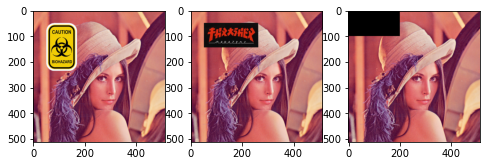

In [20]:
print(sticker_caution.shape)
print(image_bgr.shape)

fig, axs = plt.subplots(1,3, figsize=(8,5))
axs[0].imshow(cv2.cvtColor(overlay_sticker_with_alpha_channel(image=image_bgr, sticker=sticker_caution), cv2.COLOR_BGR2RGB))
axs[1].imshow(cv2.cvtColor(overlay_sticker_with_alpha_channel(image=image_bgr, sticker=sticker_trasher_black), cv2.COLOR_BGR2RGB))
axs[2].imshow(image)

In [21]:
import pandas as pd
df = pd.read_csv("../data/datasets/gtsdb/TrainIJCNN2013/TrainIJCNN2013/gt.txt",
                 sep=";",
                 names=["Filename", "X1.ROI", "Y1.ROI", "X2.ROI", "Y2.ROI", "classID"]
                 )
print(df)

      Filename  X1.ROI  Y1.ROI  X2.ROI  Y2.ROI  classID
0    00000.ppm     774     411     815     446       11
1    00001.ppm     983     388    1024     432       40
2    00001.ppm     386     494     442     552       38
3    00001.ppm     973     335    1031     390       13
4    00002.ppm     892     476    1006     592       39
..         ...     ...     ...     ...     ...      ...
847  00570.ppm     881     416     914     449        9
848  00571.ppm    1287     361    1308     384       17
849  00575.ppm     403     474     435     506       38
850  00593.ppm     584     510     608     534       38
851  00599.ppm     700     454     722     476        9

[852 rows x 6 columns]


In [22]:
df["ROI.HEIGHT"] = df["Y2.ROI"] - df["Y1.ROI"]
df["ROI.WIDTH"] = df["X2.ROI"] - df["X1.ROI"]
print(df)

      Filename  X1.ROI  Y1.ROI  X2.ROI  Y2.ROI  classID  ROI.HEIGHT  ROI.WIDTH
0    00000.ppm     774     411     815     446       11          35         41
1    00001.ppm     983     388    1024     432       40          44         41
2    00001.ppm     386     494     442     552       38          58         56
3    00001.ppm     973     335    1031     390       13          55         58
4    00002.ppm     892     476    1006     592       39         116        114
..         ...     ...     ...     ...     ...      ...         ...        ...
847  00570.ppm     881     416     914     449        9          33         33
848  00571.ppm    1287     361    1308     384       17          23         21
849  00575.ppm     403     474     435     506       38          32         32
850  00593.ppm     584     510     608     534       38          24         24
851  00599.ppm     700     454     722     476        9          22         22

[852 rows x 8 columns]


## Resize images

In [23]:
# 187 / 100 * x = 10
x = 100 / 187 * 10
print(x)
print(187 / 100 * 5.3475)

5.347593582887701
9.999825000000001


Resize sticker to fit fraction of sign roi.

In [24]:
height = int(df.iloc[0]["ROI.HEIGHT"] / 100 * 10) # 10% of roi of picture 1
factor = 100 / sticker_caution.shape[0] * height
print(factor, height)

1.6042780748663104 3


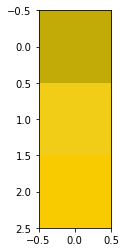

In [25]:
width = int(sticker_caution.shape[1] * factor / 100)
dim = (width, height)
sticker_resized = cv2.resize(sticker_caution, dim)
plt.imshow(cv2.cvtColor(sticker_resized, cv2.COLOR_BGR2RGB))

## Add Sticker to Sign

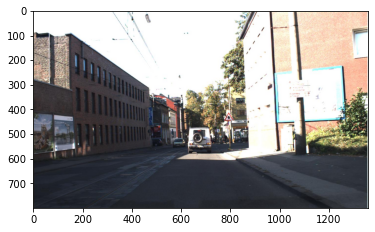

In [26]:
origImage = cv2.imread("../data/datasets/gtsdb/train/images/00000.jpg")
sticker_caution = cv2.imread(f"{sticker_folder_path}{stickers[8]}")
origImage_rgb = cv2.cvtColor(origImage, cv2.COLOR_BGR2RGB)
plt.imshow(origImage_rgb)

Sticker is added to the ROI of the traffic Sign, however it is still possible, that the sticker isn't overlaying the actual sign, as the ROI of the sing is a box. Thus, if the sign is not rectagular, the sticker can be inside the roi but not actually on the sign itself. To overcome that, one idea was to shrink the ROI around the center, so that a new ROI is created, that is covered completely by the sign. However parts of the sign would be lost, like the edges for a triangular sign. This would be the trade off that would have to be made.

for a triangular sign:
* the whole area of the roi covers: 1435Pixels -> 100%
* The area of the actual traffic sign is only: $\frac{1}{2}*g*h = \frac{1}{2}*41*35 = 717.5$
That means the actual traffic sign for only covers **50%** of the whole roi. (which makes senses as this is exactly how the formular for calculating the area of a triangle works...)

In [34]:
print(df.iloc[0]["ROI.HEIGHT"] * df.iloc[0]["ROI.WIDTH"])
print(f"height: {df.iloc[0]['ROI.HEIGHT']}")
print(f"width: {df.iloc[0]['ROI.WIDTH']}")
print((1/2) * df.iloc[0]["ROI.WIDTH"] * df.iloc[0]["ROI.HEIGHT"])
# 1435 / 100 * x = 717.5
print((100 / 1435) * 717.5)

1435
height: 35
width: 41
717.5
50.0


for a circle:
* the whole ROI in this picture covers: 13224pixels -> 100%
* the actual traffic sign covers: 10207.034531pixels -> 77.18568%

In [38]:
print(df.iloc[4]["ROI.HEIGHT"] * df.iloc[4]["ROI.WIDTH"])
print(f"height: {df.iloc[4]['ROI.HEIGHT']}")
print(f"width: {df.iloc[4]['ROI.WIDTH']}")
print(np.pi * np.power((df.iloc[4]["ROI.WIDTH"] / 2), 2))
# 1435 / 100 * x = 717.5
print((100 / 13224) * 10207.034531)

13224
height: 116
width: 114
10207.034531513238
77.18568157138536


für ne raute:
* the whole roi covers 1369pixels -> 100%
* the actual sign covers 684.5pixels -> 50%

In [43]:
# print(df.loc[df["classID"] == 12])
raute = df.iloc[14]
print(raute.loc["ROI.HEIGHT"] * raute.loc["ROI.WIDTH"])
print(f"height: {raute.loc['ROI.HEIGHT']}")
print(f"width: {raute.loc['ROI.WIDTH']}")
print((1/2) * raute.loc["ROI.HEIGHT"] * raute.loc["ROI.WIDTH"])
# 1435 / 100 * x = 717.5
print((100 / 13224) * 10207.034531)

1369
height: 37
width: 37
684.5
77.18568157138536


Find an algorithm that calculates the boundaries for the random generator, so that the random generator will always generate a position where the stickers is on the actual traffic sign

In [27]:
def add_sticker_to_roi(gt, image, sticker):
    overlayed_image = image.copy()
    
    height = int(gt.loc["ROI.HEIGHT"] / 100 * 20)
    scaling_factor = 100 / sticker.shape[0] * height
    width = int(sticker.shape[1] * scaling_factor / 100)
    scaling_dimensions = (width, height)
    sticker_resized = cv2.resize(sticker, scaling_dimensions)
    print(sticker_resized.shape)

    x_offset = np.random.randint(0, gt.loc["ROI.HEIGHT"] - sticker_resized.shape[1] + 1)
    y_offset = np.random.randint(0, gt.loc["ROI.WIDTH"] - sticker_resized.shape[0] + 1)

    print(overlayed_image[
        y_offset + gt.loc["Y1.ROI"] : y_offset + gt.loc["Y1.ROI"] + sticker_resized.shape[0],
        x_offset + gt.loc["X1.ROI"] : x_offset + gt.loc["X1.ROI"] + sticker_resized.shape[1]
        ].shape)

    overlayed_image[
        y_offset + gt.loc["Y1.ROI"] : y_offset + gt.loc["Y1.ROI"] + sticker_resized.shape[0],
        x_offset + gt.loc["X1.ROI"] : x_offset + gt.loc["X1.ROI"] + sticker_resized.shape[1]
        ] = sticker_resized

    return overlayed_image
    
    

(7, 4, 3)
(7, 4, 3)


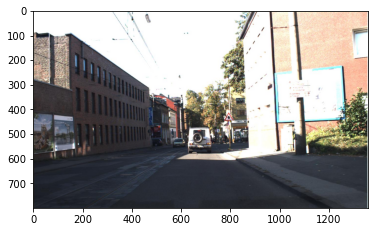

In [28]:
overlayed = add_sticker_to_roi(df.iloc[0], origImage, sticker_caution)
overlayed_rgb = cv2.cvtColor(overlayed, cv2.COLOR_BGR2RGB)
cv2.imwrite("overlayed_test.png", overlayed)
plt.imshow(overlayed_rgb)

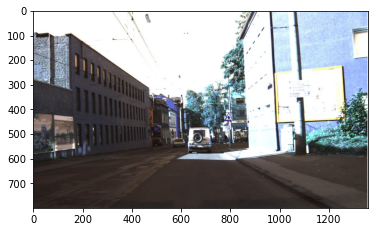

In [29]:
startpoint = (df.iloc[0]["X1.ROI"],df.iloc[0]["Y1.ROI"])
endpoint = (df.iloc[0]["X2.ROI"],df.iloc[0]["Y2.ROI"])
color = (0,0,0)
thickness = 1
overlayed = cv2.rectangle(overlayed, startpoint, endpoint, color=color, thickness=thickness)
cv2.imwrite("overlayed_with_border_test.png", overlayed)
plt.imshow(overlayed)